In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Define dataset directory path
data_dir = "CGMacros"
# Load participant demographic and health data
bio_df = pd.read_csv(os.path.join(data_dir, "bio.csv"))
microbes_df = pd.read_csv(os.path.join(data_dir, "microbes.csv"))
gut_health_df = pd.read_csv(os.path.join(data_dir, "gut_health_test.csv"))



In [63]:
bio_df.head()

,subject,Age,Gender,BMI,Body weight,Height,Self-identify,A1c PDL (Lab),Fasting GLU - PDL (Lab),Insulin,...,LDL (Cal),VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2
0,1,27,M,22.265239,133.8,65.0,Hispanic/Latino,5.4,91,2.5,...,130,13,2.9,11:06:00 AM,89,9:40,73,12:11,81,13:18
1,2,49,F,30.946742,169.2,62.0,Hispanic/Latino,5.5,93,14.8,...,78,12,2.0,7:38:00 AM,91,7:52,123,9:21,80,10:22
2,3,59,F,26.948690,157.0,64.0,Hispanic/Latino,6.5,118,17.4,...,90,31,2.6,7:25:00 AM,119,7:38,166,9:23,98,10:23
3,4,33,F,42.384279,262.6,66.0,Hispanic/Latino,5.5,105,19.4,...,164,60,5.8,7:20:00 AM,109,7:37,110,9:04,90,10:01
4,5,51,F,30.957534,172.0,62.5,Hispanic/Latino,6.6,144,12.9,...,157,78,7.1,7:45:00 AM,139,8:59,215,10:52,130,11:54


In [97]:
# Function to load CGM & meal data for all participants
def load_participant_data(data_dir):
    participant_data = {}

    # List all participant folders
    for folder in os.listdir(data_dir):
        if folder.startswith("CGMacros-0"):
            participant_id = folder.split("-")[-1]
            file_path = os.path.join(data_dir, folder, f"CGMacros-{participant_id}.csv")
           

            # Load CSV file if it exists
            if os.path.exists(file_path):
                participant_data[participant_id] = pd.read_csv(file_path)

    return participant_data

In [98]:
# Load all participant CGM data
participant_data = load_participant_data(data_dir)


In [99]:
meal_macros = []
for pid, df in participant_data.items():
    if {"Meal Type", "Carbs", "Protein", "Fat", "Fiber"}.issubset(df.columns):
        meal_macros.append(df.groupby("Meal Type")[["Carbs", "Protein", "Fat", "Fiber"]].mean())

meal_macros_df = pd.concat(meal_macros).reset_index()


In [100]:
meal_macros_df['Meal Type'] = (meal_macros_df['Meal Type']
                               .apply(lambda x: x.lower())
                               .replace({"snacks": "snack", "snack 1": "snack"})
                               )

meal_macros_df['Meal Type'].unique()

array(['breakfast', 'dinner', 'lunch', 'snack'], dtype=object)

In [101]:
avg_all_type = meal_macros_df.groupby('Meal Type').mean()

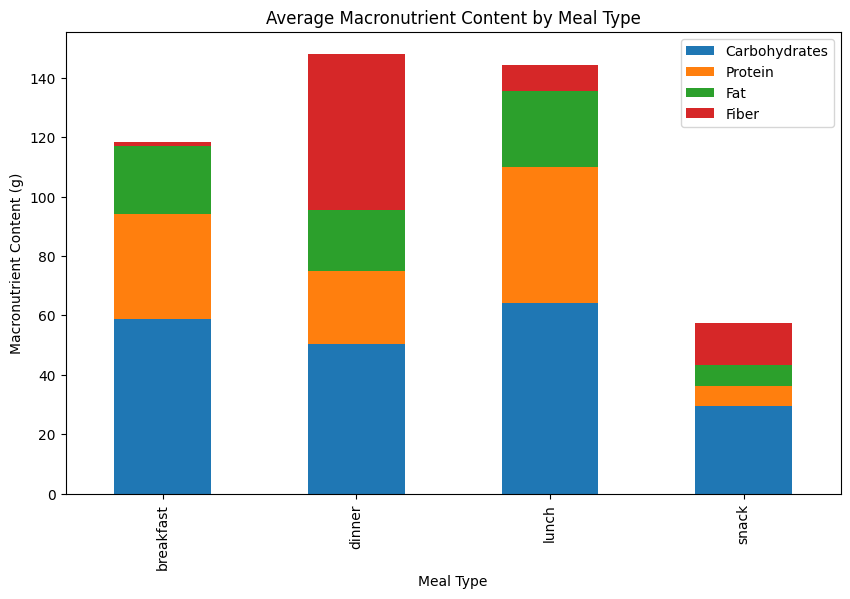

In [ ]:
avg_all_type.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Meal Type")
plt.ylabel("Macronutrient Content (g)")
plt.title("Average Macronutrient Content by Meal Type")
plt.legend(["Carbohydrates", "Protein", "Fat", "Fiber"])
plt.show()

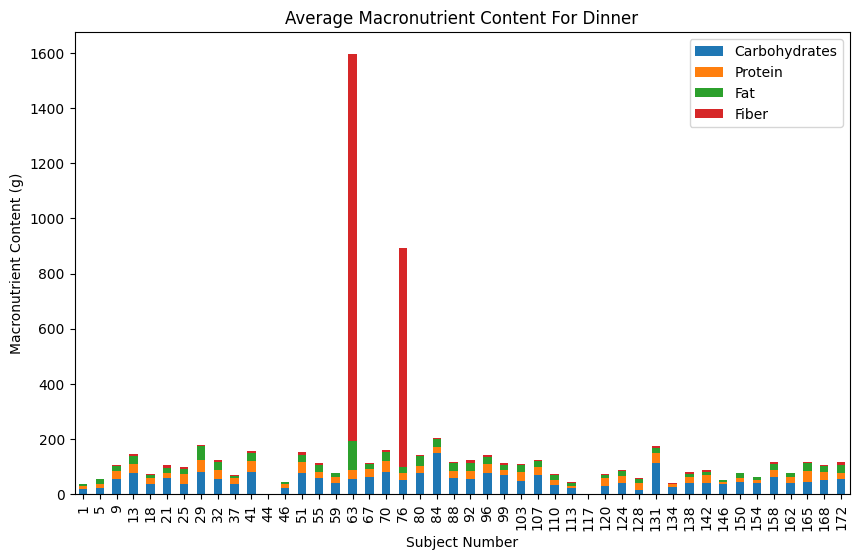

In [105]:
meal_macros_df[meal_macros_df['Meal Type'] == 'dinner'].plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Subject Number")
plt.ylabel("Macronutrient Content (g)")
plt.title("Average Macronutrient Content For Dinner")
plt.legend(["Carbohydrates", "Protein", "Fat", "Fiber"])
plt.show()